In [1]:
import pytesseract
import cv2

In [2]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
img=cv2.imread(r"C:\Computer vision\OCR\1.png")

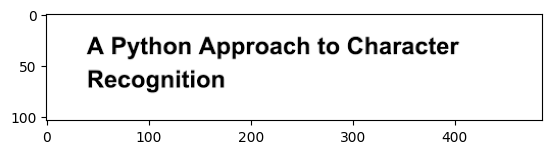

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [5]:
txt=pytesseract.image_to_string(img)
print(txt)

A Python Approach to Character
Recognition



In [6]:
data=pytesseract.image_to_data(img,output_type=pytesseract.Output.DICT)
data

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1],
 'left': [0, 40, 40, 40, 40, 65, 150, 266, 296, 42, 42],
 'top': [0, 23, 23, 23, 23, 23, 23, 24, 23, 56, 56],
 'width': [486, 365, 365, 365, 17, 77, 108, 21, 109, 132, 132],
 'height': [104, 54, 54, 22, 17, 22, 22, 16, 17, 21, 21],
 'conf': [-1, -1, -1, -1, 96, 96, 95, 95, 96, -1, 96],
 'text': ['',
  '',
  '',
  '',
  'A',
  'Python',
  'Approach',
  'to',
  'Character',
  '',
  'Recognition']}

In [7]:
data['text']

['',
 '',
 '',
 '',
 'A',
 'Python',
 'Approach',
 'to',
 'Character',
 '',
 'Recognition']

In [8]:
tgt_word='Python'

In [9]:
wrd_ind=[(i)for i,word in enumerate(data['text'])if word==tgt_word]
wrd_ind

[5]

In [10]:
for i in wrd_ind:
    (x,y,w,h)=data['left'][i],data['top'][i],data['width'][i],data['height'][i]
    img1=cv2.rectangle(img,(x,y),(x+w,y+h),(200,200,100),1)

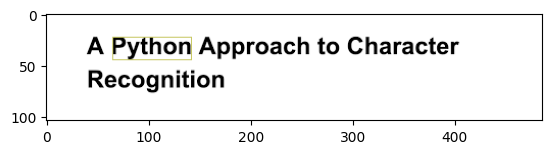

In [11]:
plt.imshow(img1)

In [12]:
img2=cv2.imread(r"C:\Computer vision\OCR\Invoice.jpg")

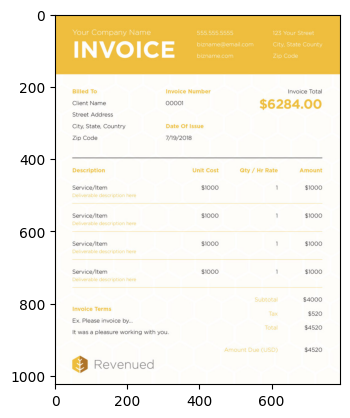

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img2)

In [14]:
txt=pytesseract.image_to_string(img2)
print(txt)

ir Company

INVOICE

Billed To Invoice Number Invoice Total

Client Name 00001 $6284.00

Street Address

City, State, Country Date Of Issue

Zip Code 7/19/2018

Description Unit Cost Qty / Hr Rate Amount
Service/item $1000 1 $1000
Deliverable description here

Service/Item $1000 1 $1000

Deliverable description here

Service/Item $1000 1 $1000
Deliverable description here
Service/Item $1000 1 $1000
Deliverable description here
Subtotal $4000
Invoice Terms
Tax $520
Ex. Please invoice by...
. Total $4520
It was a pleasure working with you.
Amount Due (USD) $4520

3 Revenued



In [15]:
data=pytesseract.image_to_data(img2,output_type=pytesseract.Output.DICT)
data

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

In [16]:
import re

In [26]:
n=len(data['text'])
for i in range(n):
    if data['conf'][i]>70:
        if re.search(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$',data['text'][i]):
            (x,y,w,h)=data['left'][i],data['top'][i],data['width'][i],data['height'][i]
            print(x,y,w,h)
            img_box1=cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),1)

In [28]:
cv2.imshow("sfjas",img_box1)
cv2.waitKey()
cv2.destroyAllWindows()


NameError: name 'img_box1' is not defined

In [29]:
plt.imshow(img_box)

NameError: name 'img_box' is not defined